<a href="https://colab.research.google.com/github/Nasyahh/Academic-Data-System/blob/main/DSI_MFM_Credit_Scoring_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparation for Python - Jupyter Notebook / Google Colab

## 1.1 Installing / Updating Python libraries

In [ ]:
# Updating select Python libraries to the latest version (if this code runs on Google Colab, otherwise run the command in command line / terminal)

# For install/updating libraries Python
# On local PC, use terminal command: pip install [name of library]
# For Google Colab, in the cell, use command: !pip install [name of library]
# Only run the following code in Google Colab (these libraries not available in default Google Colab)
!pip install shap
!pip install toad
!pip install xlwings

# Double-check the version
import sklearn as skl
print(skl. __version__)

# Then restart the runtime if required (if this code runs on Google Colab)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.6 MB/s eta 0:00:00
1.2.2


## 1.2 Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import toad
from warnings import simplefilter

from toad.metrics import KS, AUC , F1

import xlwings as xw

from sklearn.linear_model import LogisticRegression

import sklearn.metrics

from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Managing Data Pipeline (combining various data source)



## 2.1 Data Preparation and Importing data to Python

Various ways to import data from excel xls to Python
1. Readers can directly point to the excel file located on the companion website of this book
2. Directly refer to S3 file location of the excel file
3. If the code runs on a local PC, then download first and point to the excel file location in the local hard drive: example: df = pd.read_excel('C:\User\readers\downloads\Credit_Scoring_Dataset.xlsx')

Importing the dataset to create the model.

In [ ]:
# For default
default_url = 'https://raw.githubusercontent.com/IndraLukasTjahaja/Credit_Scoring/main/pmbs_scorecard_default.csv'
#local_default_path = 'c:\\Users\\indra\\OneDrive\\01 Current Projects\\pmbs_scorecard_default.csv' -> change the path to your local path
default_delimiter = ';'
df_default_0 = pd.read_csv(default_url, delimiter = default_delimiter)
print(df_default_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       800 non-null    object
 1   default  800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB
None


In [ ]:
# Input variables from user themselves
userinput_url = 'https://raw.githubusercontent.com/IndraLukasTjahaja/Credit_Scoring/main/pmbs_scorecard_userinput.csv'
#local_userinput_path = 'c:\\Users\\indra\\OneDrive\\01 Current Projects\\pmbs_scorecard_userinput.csv' -> change the path to your local path
userinput_delimiter = ';'
df_userinput_0 = pd.read_csv(userinput_url, delimiter = userinput_delimiter)
print(df_userinput_0.info())

# Input variables from external data
external_url = 'https://raw.githubusercontent.com/IndraLukasTjahaja/Credit_Scoring/main/pmbs_scorecard_external.csv'
#local_external_path = 'c:\\Users\\indra\\OneDrive\\01 Current Projects\\pmbs_scorecard_external.csv' -> change the path to your local path
external_delimiter = ';'
df_external_0 = pd.read_csv(external_url, delimiter = external_delimiter)
print(df_external_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1000 non-null   object 
 1   Loan_duration_in_month       1000 non-null   int64  
 2   Purpose                      1000 non-null   object 
 3   Loan_Amount                  1000 non-null   int64  
 4   Occupation                   988 non-null    object 
 5   Monthly_Income               990 non-null    object 
 6   Length_Employment            973 non-null    object 
 7   Marital_Status               996 non-null    object 
 8   Residential_Property_Status  997 non-null    object 
 9   Home_Address                 1000 non-null   object 
 10  Office_Address               1000 non-null   object 
 11  Age                          999 non-null    float64
 12  Present_Residence_Since      998 non-null    object 
 13  Email_Domain_Type  

In [ ]:
# Alternative links if link above does not work
#df_external = pd.read_csv('https://risikodigital.com/wp-content/uploads/2023/04/pmbs_scorecard_external.csv', sep = ';')
#df_userinput = pd.read_csv('https://risikodigital.com/wp-content/uploads/2023/04/pmbs_scorecard_userinput.csv', sep = ';')
#df_default = pd.read_csv('https://risikodigital.com/wp-content/uploads/2023/04/pmbs_scorecard_default.csv', sep = ';')

## 2.2 Combining all data into a single dataframe

In [ ]:
df_all_0 = df_userinput_0.merge(df_external_0, how ='left', on = 'ID')
df_all_0 = df_all_0.merge(df_default_0, how = 'left', on = 'ID')
print(df_all_0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1000 non-null   object 
 1   Loan_duration_in_month       1000 non-null   int64  
 2   Purpose                      1000 non-null   object 
 3   Loan_Amount                  1000 non-null   int64  
 4   Occupation                   988 non-null    object 
 5   Monthly_Income               990 non-null    object 
 6   Length_Employment            973 non-null    object 
 7   Marital_Status               996 non-null    object 
 8   Residential_Property_Status  997 non-null    object 
 9   Home_Address                 1000 non-null   object 
 10  Office_Address               1000 non-null   object 
 11  Age                          999 non-null    float64
 12  Present_Residence_Since      998 non-null    object 
 13  Email_Domain_Type  

## 2.3 Separate the dataset into two: Model_Development and Out_of_time_Validation

For data without default value, it will be your homework to predict the default based on the model from dataset in Model_Development. Model_Development will be divided again into training and validation dataset.

In actual implementation, dataset will be divided into tree: training, in-time_validation, and out-of-time_validation. Modeler will optimize their model based on training and in-time_validation. When it is completed, it will be tested against out-of-time validation to see whether the model result also consistent within different time period.


In [ ]:
# create a DataFrame with rows where isi has a value
df_dataset_0 = df_all_0[df_all_0['default'].notna()]

# create a DataFrame with rows where isi is missing
df_homework_0 = df_all_0[df_all_0['default'].isna()]

print(df_dataset_0.info())
print(df_homework_0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           800 non-null    object 
 1   Loan_duration_in_month       800 non-null    int64  
 2   Purpose                      800 non-null    object 
 3   Loan_Amount                  800 non-null    int64  
 4   Occupation                   791 non-null    object 
 5   Monthly_Income               790 non-null    object 
 6   Length_Employment            774 non-null    object 
 7   Marital_Status               797 non-null    object 
 8   Residential_Property_Status  797 non-null    object 
 9   Home_Address                 800 non-null    object 
 10  Office_Address               800 non-null    object 
 11  Age                          799 non-null    float64
 12  Present_Residence_Since      799 non-null    object 
 13  Email_Domain_Type   

In [ ]:
# Separate into training and test/validation sample dataset

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
df_train_0, df_test_0 = train_test_split(df_dataset_0, test_size=0.3, random_state=42)
print(df_train_0.info())
print(df_test_0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 404 to 102
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           560 non-null    object 
 1   Loan_duration_in_month       560 non-null    int64  
 2   Purpose                      560 non-null    object 
 3   Loan_Amount                  560 non-null    int64  
 4   Occupation                   555 non-null    object 
 5   Monthly_Income               553 non-null    object 
 6   Length_Employment            543 non-null    object 
 7   Marital_Status               559 non-null    object 
 8   Residential_Property_Status  558 non-null    object 
 9   Home_Address                 560 non-null    object 
 10  Office_Address               560 non-null    object 
 11  Age                          560 non-null    float64
 12  Present_Residence_Since      560 non-null    object 
 13  Email_Domain_Type 

# 3. Replicating Excel exercise in Python

In parallel with Excel exercise, we will be closely developing credit scoring for model_development (both training and test) to replicate the same exercise from Excel.

The objective is to show that the same method in Excel can be replicated in Python in a much faster way.

## 3.1 Removing missing data / outliers / etc

In [ ]:
# Same methodology as the excel exercise
# Select four variables first then Do not use empty data rows (Drop Data)

# Select four variables
df_dataset_excel_0 = df_dataset_0[['ID','Loan_Amount','Monthly_Income','Age','BC_Collectability','default']]

# Use the dropna() function to delete all rows that have empty data
df_dataset_excel_0 = df_dataset_excel_0.dropna()

## 3.2 EDA (Exploratory Data Analysis), WOE & IV calculation for variable BC_Collectability


In [ ]:
# Basic EDA for categorical variable BC_Collectability

# The frequency of the variable BC_Collectability
print(df_dataset_excel_0['BC_Collectability'].value_counts())

# The proportion (in percentage) of the variable BC_Collectability
print(df_dataset_excel_0['BC_Collectability'].value_counts(normalize=True) * 100)

Collectability 3    398
Collectability 1    228
Collectability 2     71
Not Found            44
Collectability 5     37
Collectability 4     12
Name: BC_Collectability, dtype: int64
Collectability 3    50.379747
Collectability 1    28.860759
Collectability 2     8.987342
Not Found            5.569620
Collectability 5     4.683544
Collectability 4     1.518987
Name: BC_Collectability, dtype: float64


In [ ]:
## EDA for categorical variable BC_Collectability with default

# How many loans default for each value of the variable BC_Collectability
print(pd.crosstab(df_dataset_excel_0['BC_Collectability'], df_dataset_excel_0['default']))
# or using pivot_table function
# pd.pivot_table(df_clean, index=['BC_Collectability'], columns=['default'], aggfunc={'default':len}, fill_value=0)

# With proportion (in percentage)
print(pd.crosstab(df_dataset_excel_0['BC_Collectability'],df_dataset_excel_0['default'],normalize='index',)*100)

default            0.0  1.0
BC_Collectability          
Collectability 1   189   39
Collectability 2    48   23
Collectability 3   277  121
Collectability 4     6    6
Collectability 5    16   21
Not Found           21   23
default                  0.0        1.0
BC_Collectability                      
Collectability 1   82.894737  17.105263
Collectability 2   67.605634  32.394366
Collectability 3   69.597990  30.402010
Collectability 4   50.000000  50.000000
Collectability 5   43.243243  56.756757
Not Found          47.727273  52.272727


In [ ]:
# Manual calculation of WoE and IV

def woe_discrete(df, discrete_variable_name, target_variable_name):
    df = df[[discrete_variable_name,target_variable_name]]
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_bad'] / df['prop_n_good'])
    df = df.sort_values([df.columns.values[0]])
    #df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_bad'] = df['prop_bad'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_bad'] - df['prop_n_good']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

df_temp = woe_discrete(df_dataset_excel_0, 'BC_Collectability', 'default')
df_temp

,BC_Collectability,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,Collectability 1,228,0.171053,0.288608,39.0,189.0,0.339318,0.167382,-0.706659,NaN,NaN,0.266145
1,Collectability 2,71,0.323944,0.089873,23.0,48.0,0.086176,0.098712,0.135820,0.152891,0.842479,0.266145
2,Collectability 3,398,0.304020,0.503797,121.0,277.0,0.497307,0.519313,0.043300,0.019924,0.092520,0.266145
3,Collectability 4,12,0.500000,0.015190,6.0,6.0,0.010772,0.025751,0.871527,0.195980,0.828227,0.266145
4,Collectability 5,37,0.567568,0.046835,21.0,16.0,0.028725,0.090129,1.143461,0.067568,0.271934,0.266145
5,Not Found,44,0.522727,0.055696,23.0,21.0,0.037702,0.098712,0.962499,0.044840,0.180962,0.266145


In [ ]:
# Create binning for BC_Collectability
temp = df_dataset_excel_0

conditions = [
             ( temp['BC_Collectability'] == 'Collectability 1' ),
             ( temp['BC_Collectability'] == 'Collectability 2' ) | ( temp['BC_Collectability'] == 'Collectability 3' ),
             ( temp['BC_Collectability'] == 'Collectability 4' ) | ( temp['BC_Collectability'] == 'Collectability 5' ),
             ( temp['BC_Collectability'] == 'Not Found' )
             ]
choices = [
          'Collectability 1',
          'Collectability 2&3',
          'Collectability 4&5',
          'Not Found'
          ]
temp['BC_Collectability_Bin'] = np.select(conditions, choices)

df_temp = woe_discrete(temp, 'BC_Collectability_Bin', 'default')
df_temp

,BC_Collectability_Bin,n_obs,prop_bad,prop_n_obs,n_bad,n_good,prop_n_good,prop_n_bad,WoE,diff_prop_bad,diff_WoE,IV
0,Collectability 1,228,0.171053,0.288608,39.0,189.0,0.339318,0.167382,-0.706659,NaN,NaN,0.264421
1,Collectability 2&3,469,0.307036,0.593671,144.0,325.0,0.583483,0.618026,0.057515,0.135984,0.764173,0.264421
2,Collectability 4&5,49,0.551020,0.062025,27.0,22.0,0.039497,0.115880,1.076321,0.243984,1.018806,0.264421
3,Not Found,44,0.522727,0.055696,23.0,21.0,0.037702,0.098712,0.962499,0.028293,0.113823,0.264421


<Axes: xlabel='BC_Collectability', ylabel='prop'>

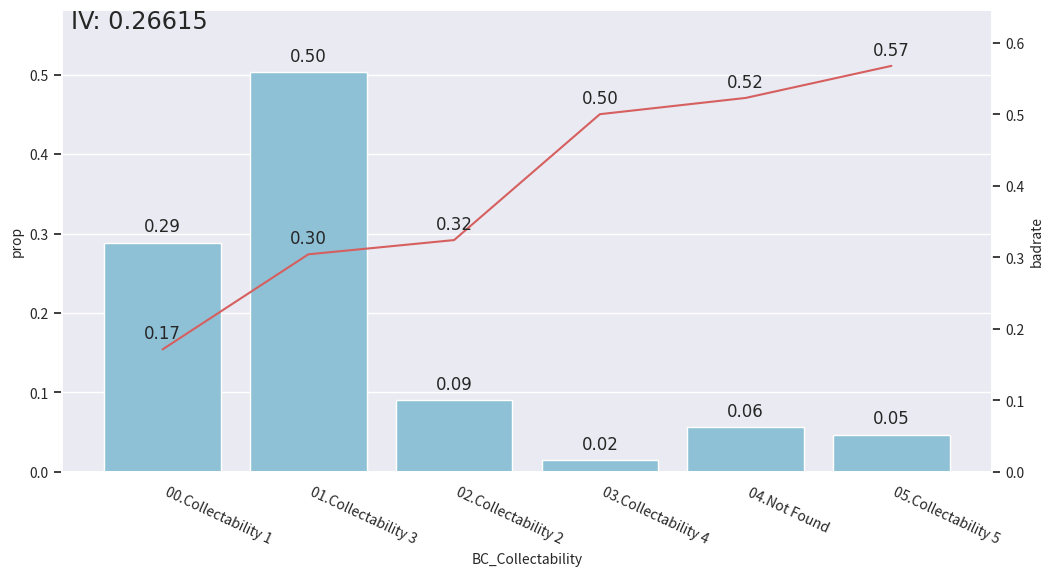

In [ ]:
# Using Toad (https://toad.readthedocs.io/en/stable/tutorial.html) to calculate WoE and IV

# initialise toad
c = toad.transform.Combiner()

to_drop=['ID']
# Train binning with the selected features from previous; use reliable Chi-squared binning, and control that each bucket has at least 5% sample.
c.fit(df_dataset_excel_0, y = 'default', method = 'chi', min_samples = 0.01, exclude = to_drop) #empty_separate = False #using min_sample=0.01 to include all, typically use 0.05

from toad.plot import bin_plot

# Check the bin results of 'BC_Collectability' of in-sample
col = 'BC_Collectability'

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

<Axes: xlabel='BC_Collectability', ylabel='prop'>

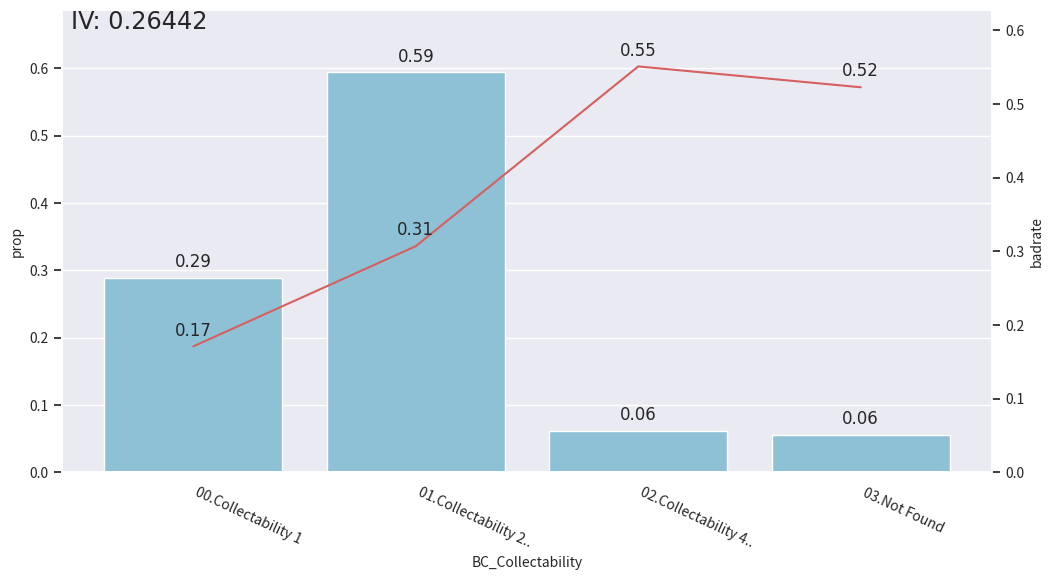

In [ ]:
# Adjust bins to be the same as the one in Excel

# Set new bins
rule = {'BC_Collectability':[['Collectability 1'], ['Collectability 2','Collectability 3'], ['Collectability 4','Collectability 5'],['Not Found']]}

# Pass new bins
c.update(rule)

bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

## 3.3 EDA, WOE & IV calculation for variable Age

In [ ]:
# Summary statistics for the numerical variable Age
print(df_dataset_excel_0['Age'].describe())

count    790.000000
mean      35.397468
std       11.484336
min       19.000000
25%       27.000000
50%       33.000000
75%       41.000000
max       75.000000
Name: Age, dtype: float64


<Axes: >

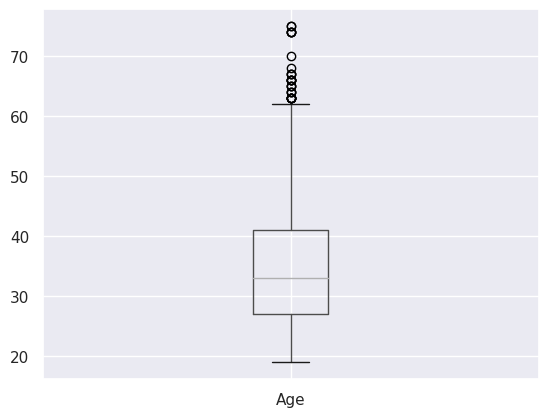

In [ ]:
df_dataset_excel_0.boxplot(column=['Age'])

In [ ]:
# Summary statistics for the numerical variable Age, by whether the loan default or not
df_dataset_excel_0.groupby('default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,557.0,36.109515,11.479127,19.0,27.0,34.0,42.0,75.0
1.0,233.0,33.695279,11.340985,19.0,25.0,30.0,40.0,74.0


<ipython-input-19-f382c1b79159>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset_excel_0['Age'].dropna(), ax=ax).set_title('Distribution Plot')


Text(0.5, 1.0, 'Distribution Plot')

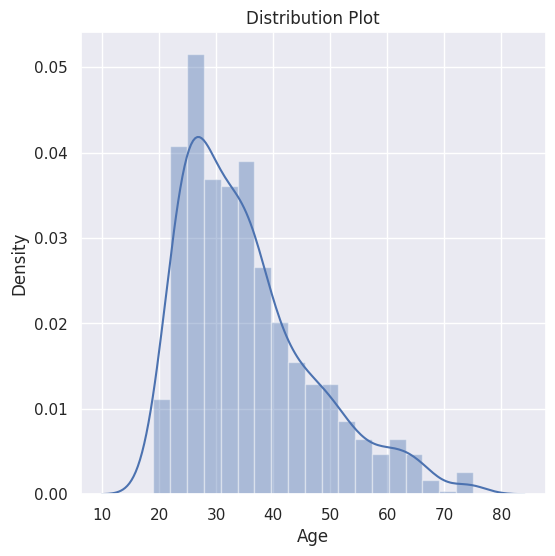

In [ ]:
# distplot() function from seaborn library
# Note that the distribution plot must have no missing values. Therefore have to add the function dropna() to temporarily not include missing values in making distribution plots

fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(df_dataset_excel_0['Age'].dropna(), ax=ax).set_title('Distribution Plot')

<ipython-input-20-a84779cfbf92>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Age'], ax=ax).set_title('Age Plot')
<ipython-input-20-a84779cfbf92>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'], ax=ax).set_title('Age Plot')


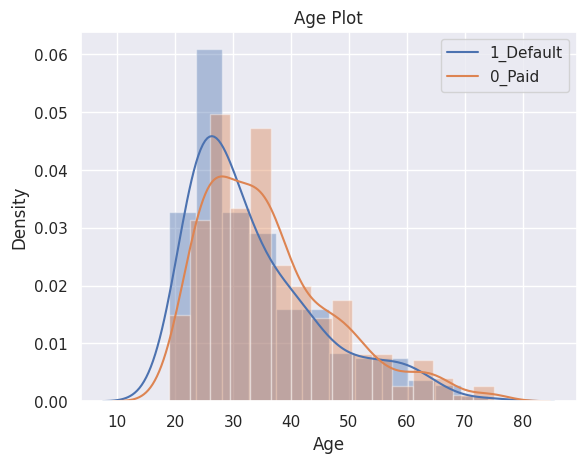

In [ ]:
# Distribution Plot of Age by whether the loan default or not
df_0 = df_dataset_excel_0[df_dataset_excel_0.default == 0]
df_1 = df_dataset_excel_0[df_dataset_excel_0.default == 1]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
sns.distplot(df_1['Age'], ax=ax).set_title('Age Plot')
sns.distplot(df_0['Age'], ax=ax).set_title('Age Plot')
ax.legend(labels=["1_Default","0_Paid"])

<Axes: xlabel='Age', ylabel='prop'>

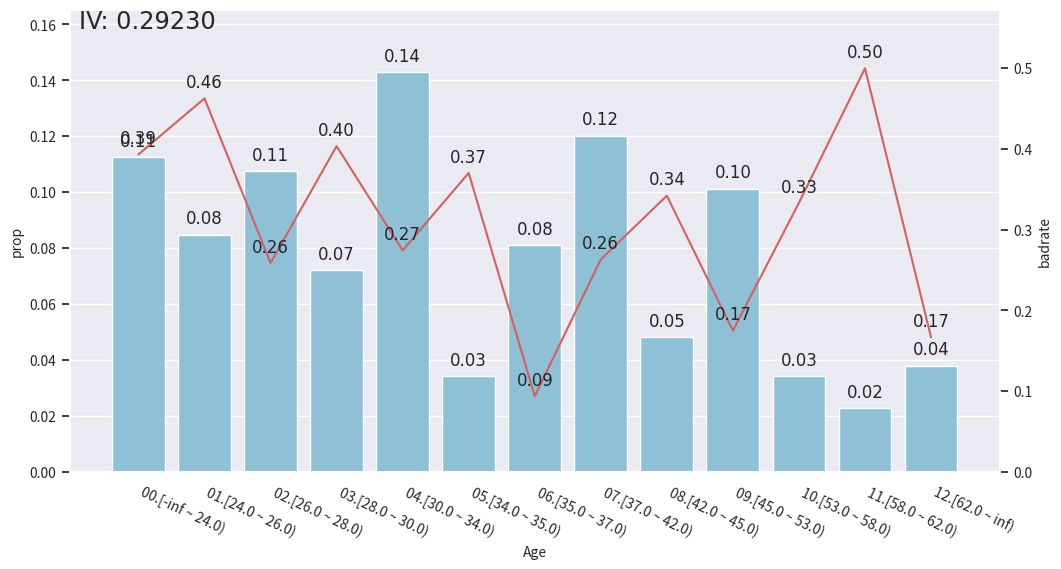

In [ ]:
# Using Toad (https://toad.readthedocs.io/en/stable/tutorial.html) to calculate WoE and IV

# Check the bin results of 'BC_Collectability' of in-sample
col = 'Age'

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

<Axes: xlabel='Age', ylabel='prop'>

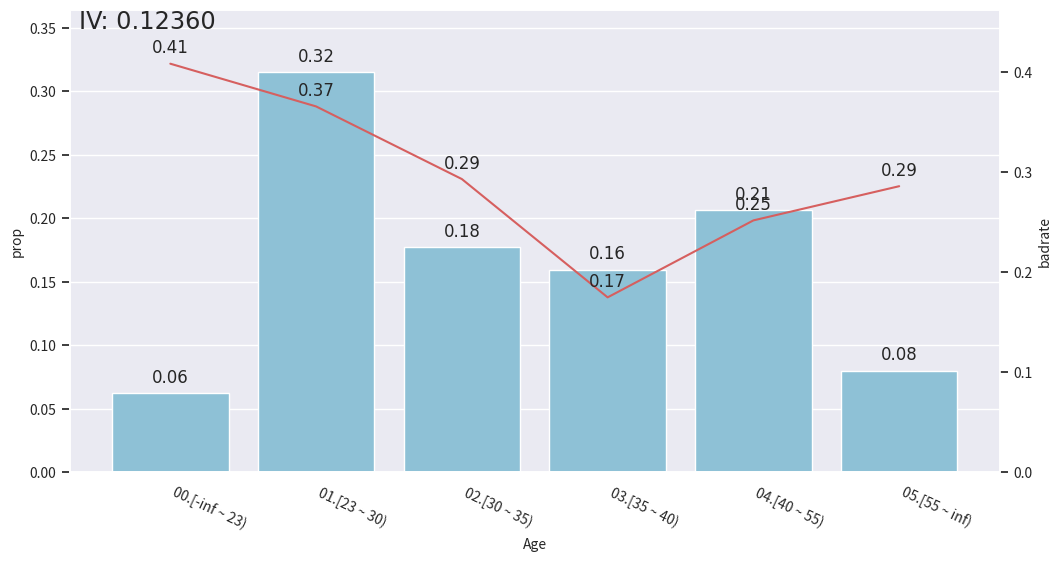

In [ ]:
# Adjust bins to be the same as the one in Excel

# Set new bins
rule = {'Age':[23, 30, 35, 40, 55]}

# Pass new bins
c.update(rule)

bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

## 3.4 Feature Engineering: DBR and WOE,IV calculation

In [ ]:
# Create DBR

conditions = [
             ( df_dataset_excel_0['Monthly_Income'] == 'a. Less 100' ),
             ( df_dataset_excel_0['Monthly_Income'] == 'b. 100 - 500' ),
             ( df_dataset_excel_0['Monthly_Income'] == 'c. 500 - 1000' ),
             ( df_dataset_excel_0['Monthly_Income'] == 'd. 1000 - 2000' ),
             ( df_dataset_excel_0['Monthly_Income'] == 'e. More 2000' )
             ]
choices = [
          100,
          500,
          1000,
          2000,
          3000
          ]
df_dataset_excel_0['max_income'] = np.select(conditions, choices)

df_dataset_excel_0['DBR'] = df_dataset_excel_0['Loan_Amount'] / df_dataset_excel_0['max_income']

<ipython-input-24-d10b1f73b126>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['DBR'], ax=ax).set_title('DBR Plot')
<ipython-input-24-d10b1f73b126>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['DBR'], ax=ax).set_title('DBR Plot')


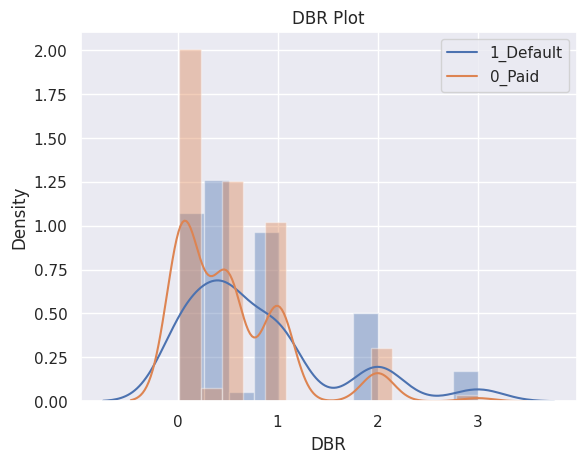

In [ ]:
# Distribution Plot of Age by whether the loan default or not
df_0 = df_dataset_excel_0[df_dataset_excel_0.default == 0]
df_1 = df_dataset_excel_0[df_dataset_excel_0.default == 1]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
sns.distplot(df_1['DBR'], ax=ax).set_title('DBR Plot')
sns.distplot(df_0['DBR'], ax=ax).set_title('DBR Plot')
ax.legend(labels=["1_Default","0_Paid"])

<Axes: xlabel='DBR', ylabel='prop'>

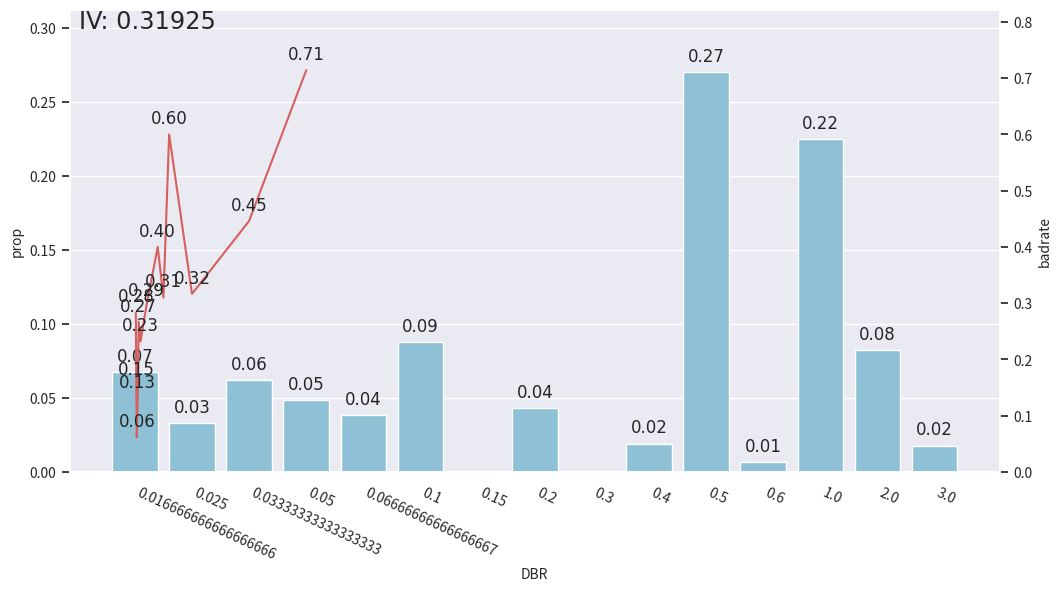

In [ ]:
# Using Toad (https://toad.readthedocs.io/en/stable/tutorial.html) to calculate WoE and IV

# Check the bin results of 'BC_Collectability' of in-sample
col = 'DBR'

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

<Axes: xlabel='DBR', ylabel='prop'>

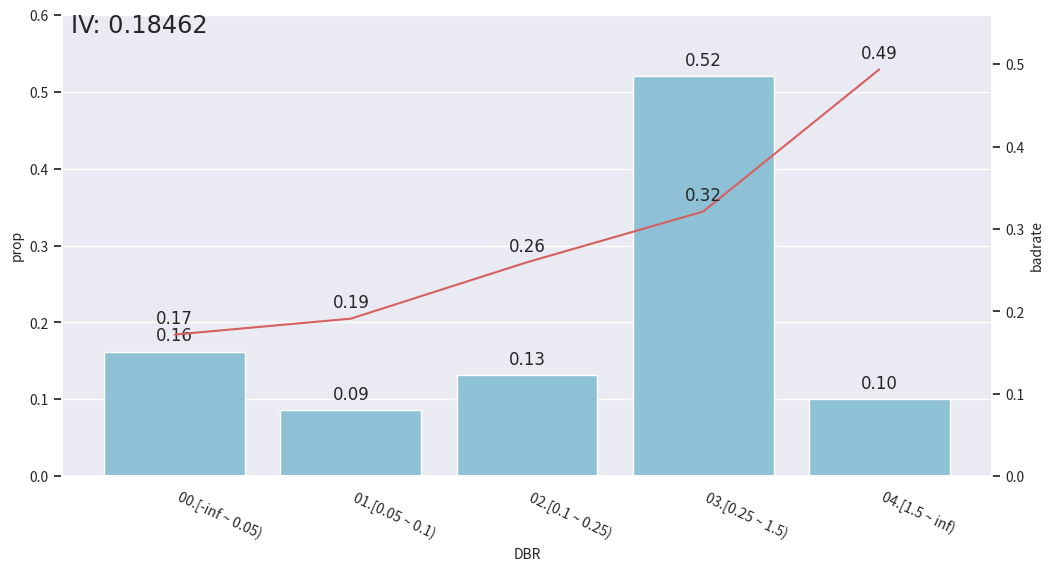

In [ ]:
# Adjust bins to be the same as the one in Excel

# Set new bins
rule = {'DBR':[0.05, 0.1, 0.25, 1.5]}

# Pass new bins
c.update(rule)

bin_plot(c.transform(df_dataset_excel_0[[col,'default']], labels=True), x=col, target='default')

## 3.5 Logistic Regression in Python (have same result as Excel)

In [ ]:
df_dataset_excel_0.head()
df_dataset_excel_1 = df_dataset_excel_0[['DBR','BC_Collectability_Bin','ID','default','Age']]

In [ ]:
# Initialise
transer = toad.transform.WOETransformer()

# transer.fit_transform() & combiner.transform(). Remember to exclude target
train_woe = transer.fit_transform(c.transform(df_dataset_excel_1), df_dataset_excel_1['default'], exclude=to_drop+['default'])

print(train_woe.head(3))

        DBR  BC_Collectability_Bin       ID  default       Age
0 -0.700870              -0.706659  ABC0001      0.0 -0.044764
1  0.846209               0.057515  ABC0002      1.0  0.499963
2  0.123117              -0.706659  ABC0003      0.0 -0.218922


In [ ]:
# Apply stepwise regression on the WOE-transformed data
final_data = toad.selection.stepwise(train_woe,target = 'default', estimator='ols', direction = 'both', criterion = 'aic', exclude = to_drop)

#  Place the selected features to test / OOT sample
#final_OOT = OOT_woe[final_data.columns]

print(final_data.shape) #  Out of 31 features, stepwise regression selected 10 of them.
print(final_data.head())

(790, 5)
        DBR  BC_Collectability_Bin       ID  default       Age
0 -0.700870              -0.706659  ABC0001      0.0 -0.044764
1  0.846209               0.057515  ABC0002      1.0  0.499963
2  0.123117              -0.706659  ABC0003      0.0 -0.218922
3  0.846209               0.057515  ABC0004      0.0 -0.218922
4  0.123117               0.057515  ABC0005      1.0 -0.218922


In [ ]:
# The final list of features for modelling
col = list(final_data.drop(to_drop+['default'],axis=1).columns)

In [ ]:
# Build a logit
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=1000, tol=1e-6, C=1e12)
lr.fit(final_data[col], final_data['default'])

# Obtain predicted probability for training
pred_train = lr.predict_proba(final_data[col])[:,1]

In [ ]:
#print regression coefficients
print('coefficients', col, lr.coef_)

#print intercept value
print('intercept', lr.intercept_)

#should be the same result as excel

coefficients ['DBR', 'BC_Collectability_Bin', 'Age'] [[1.06775058 1.00274278 0.78546756]]
intercept [-0.87675287]


In [ ]:
final_data.head()

,DBR,BC_Collectability_Bin,ID,default,Age
0,-0.700870,-0.706659,ABC0001,0.0,-0.044764
1,0.846209,0.057515,ABC0002,1.0,0.499963
2,0.123117,-0.706659,ABC0003,0.0,-0.218922
3,0.846209,0.057515,ABC0004,0.0,-0.218922
4,0.123117,0.057515,ABC0005,1.0,-0.218922


## 3.6 Scorecard in Python (have same result as Excel)

In [ ]:
card = toad.ScoreCard(
    combiner = c,
    transer = transer,
    solver='liblinear', max_iter=1000, tol=1e-6, C=1e12,
    #class_weight = 'balanced',
    base_score = 600,
    base_odds = 4,
    pdo = 50,
    rate = 2
)

card.fit(final_data[col], final_data['default'])

# Output standard scorecard
card.export()

{'DBR': {'[-inf ~ 0.05)': 241.73,
  '[0.05 ~ 0.1)': 231.72,
  '[0.1 ~ 0.25)': 201.34,
  '[0.25 ~ 1.5)': 178.27,
  '[1.5 ~ inf)': 122.57},
 'BC_Collectability_Bin': {'Collectability 1': 238.86,
  'Collectability 2&3': 183.59,
  'Not Found': 118.13,
  'Collectability 4&5': 109.9},
 'Age': {'[-inf ~ 23)': 159.42,
  '[23 ~ 30)': 169.63,
  '[30 ~ 35)': 188.32,
  '[35 ~ 40)': 226.38,
  '[40 ~ 55)': 200.15,
  '[55 ~ inf)': 190.28}}

In [ ]:
# function to implement the scorecard
score = card.predict(df_dataset_excel_1[col])

# Attach the result back to dataframe
scorecard = pd.DataFrame(score.reshape(-1, 1), columns=['Scorecard'])
df_dataset_excel_2 = pd.concat([df_dataset_excel_1, scorecard], axis=1)

df_dataset_excel_2.head()

,DBR,BC_Collectability_Bin,ID,default,Age,Scorecard
0,0.016667,Collectability 1,ABC0001,0.0,67.0,670.877452
1,2.000000,Collectability 2&3,ABC0002,1.0,22.0,465.579835
2,1.000000,Collectability 1,ABC0003,0.0,49.0,617.280126
3,2.000000,Collectability 2&3,ABC0004,0.0,45.0,506.311529
4,1.000000,Collectability 2&3,ABC0005,1.0,53.0,562.005469


# 4. Scorecard using all variables in Python

Implement training and test/validation to scorecard method in Python

In [ ]:
# Using training and test data from part 2.3
print(df_train_0.info())
print(df_test_0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 404 to 102
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           560 non-null    object 
 1   Loan_duration_in_month       560 non-null    int64  
 2   Purpose                      560 non-null    object 
 3   Loan_Amount                  560 non-null    int64  
 4   Occupation                   555 non-null    object 
 5   Monthly_Income               553 non-null    object 
 6   Length_Employment            543 non-null    object 
 7   Marital_Status               559 non-null    object 
 8   Residential_Property_Status  558 non-null    object 
 9   Home_Address                 560 non-null    object 
 10  Office_Address               560 non-null    object 
 11  Age                          560 non-null    float64
 12  Present_Residence_Since      560 non-null    object 
 13  Email_Domain_Type 

## 4.1 Quick EDA and Removing missing data / outliers / etc

In [ ]:
# Quick EDA to check missing/outliers/unique

toad.detect(df_train_0)[:10]

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
ID,object,560,0.00%,560,ABC0405:0.18%,ABC0497:0.18%,ABC0387:0.18%,ABC0776:0.18%,ABC0510:0.18%,ABC0508:0.18%,ABC0430:0.18%,ABC0305:0.18%,ABC0180:0.18%,ABC0103:0.18%
Loan_duration_in_month,int64,560,0.00%,6,3.408929,1.892153,1.0,1.0,1.0,3.0,5.0,6.0,6.0,6.0
Purpose,object,560,0.00%,6,electronics:40.71%,business_loan:17.14%,food:13.39%,household_appliances:11.61%,vacation:9.11%,business_loan:17.14%,food:13.39%,household_appliances:11.61%,vacation:9.11%,education:8.04%
Loan_Amount,int64,560,0.00%,4,99.910714,63.619165,50.0,50.0,50.0,100.0,100.0,200.0,300.0,300.0
Occupation,object,560,0.89%,4,permanent_employee:60.54%,self-employed:20.18%,unemployed:15.71%,contract_employee:2.68%,None,None,permanent_employee:60.54%,self-employed:20.18%,unemployed:15.71%,contract_employee:2.68%
Monthly_Income,object,560,1.25%,5,a. Less 100:58.75%,e. More 2000:17.68%,b. 100 - 500:11.61%,c. 500 - 1000:5.71%,d. 1000 - 2000:5.00%,a. Less 100:58.75%,e. More 2000:17.68%,b. 100 - 500:11.61%,c. 500 - 1000:5.71%,d. 1000 - 2000:5.00%
Length_Employment,object,560,3.04%,5,c. 1-4 years:33.75%,e. More7 years:25.36%,b. Less1 years:16.07%,d. 4-7 years:15.54%,a. unemployed:6.25%,c. 1-4 years:33.75%,e. More7 years:25.36%,b. Less1 years:16.07%,d. 4-7 years:15.54%,a. unemployed:6.25%
Marital_Status,object,560,0.18%,3,married:53.93%,single:32.14%,divorced:13.75%,None,None,None,None,married:53.93%,single:32.14%,divorced:13.75%
Residential_Property_Status,object,560,0.36%,3,own:69.82%,rent:17.14%,family_owned:12.68%,None,None,None,None,own:69.82%,rent:17.14%,family_owned:12.68%
Home_Address,object,560,0.00%,4,Area_2:35.00%,Area_1:30.18%,Area_3:19.82%,Area_4:15.00%,None,None,Area_2:35.00%,Area_1:30.18%,Area_3:19.82%,Area_4:15.00%


In [ ]:
toad.quality(df_train_0,'default',iv_only=True)[:15]

,iv,gini,entropy,unique
ID,1.441161,NaN,NaN,560.0
BC_Outstanding_CC,0.957620,NaN,NaN,244.0
API_CreditScore_Vendor_B,0.867398,NaN,NaN,253.0
BC_Monthly_Installment,0.860164,NaN,NaN,111.0
Age,0.351913,NaN,NaN,52.0
BC_Collectability,0.287167,NaN,NaN,6.0
API_CreditScore_Vendor_A,0.280351,NaN,NaN,408.0
Mobile_Provider,0.265650,NaN,NaN,5.0
Mobile_Number_Active_Since,0.211602,NaN,NaN,5.0
Loan_duration_in_month,0.210913,NaN,NaN,6.0


In [ ]:
# Delete any rows that has at least one empty content

# Use the dropna() function to delete all rows that have empty data
df_train_1 = df_train_0.dropna()
df_test_1 = df_test_0.dropna()

## 4.2 Feature Engineering

In [ ]:
# Create DBR feature engineering
def max_income(df, col_name):
    conditions = [
        (df[col_name] == 'a. Less 100'),
        (df[col_name] == 'b. 100 - 500'),
        (df[col_name] == 'c. 500 - 1000'),
        (df[col_name] == 'd. 1000 - 2000'),
        (df[col_name] == 'e. More 2000'),
    ]
    choices = [100, 500, 1000, 2000, 3000]

    df['max_income'] = np.select(conditions, choices)
    return df

# Use the function to add 'max_income' column
df_train_1 = max_income(df_train_1, 'Monthly_Income')
df_test_1 = max_income(df_test_1, 'Monthly_Income')

df_train_1['DBR'] = df_train_1['Loan_Amount'] / df_train_1['max_income']
df_test_1['DBR'] = df_test_1['Loan_Amount'] / df_test_1['max_income']

<ipython-input-40-b5b8edd57cc3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_income'] = np.select(conditions, choices)
<ipython-input-40-b5b8edd57cc3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_income'] = np.select(conditions, choices)
<ipython-input-40-b5b8edd57cc3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
# Create Variable Home Address within the same area as Office Address
def same_officehome(df, col_name1, col_name2):
    conditions = [
        (df[col_name1] == df[col_name2]),
        (df[col_name1] != df[col_name2])
    ]
    choices = [1, 0]

    df['same_officehome'] = np.select(conditions, choices)
    return df

# Use the function to add 'same_officehome' column
df_train_1 = same_officehome(df_train_1, 'Home_Address', 'Office_Address')
df_test_1 = same_officehome(df_test_1, 'Home_Address', 'Office_Address')

<ipython-input-41-844f78278ecd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_officehome'] = np.select(conditions, choices)
<ipython-input-41-844f78278ecd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['same_officehome'] = np.select(conditions, choices)


In [ ]:
# Homework, create DBR using combination of Loan_Amount, BC_Monthly_Installment, and BC_Outstanding_CC

## 4.3 Check for correlation

Note that regression especially need to be aware of correlation as it may affect the model

In [ ]:
# Correlation Between All Numerical Variables
import seaborn as sns
corr = df_train_1.corr()
corr

<ipython-input-43-6446c156f0d4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_1.corr()


,Loan_duration_in_month,Loan_Amount,Age,BC_Monthly_Installment,BC_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,default,max_income,DBR,same_officehome
Loan_duration_in_month,1.000000,0.319122,0.027755,0.008954,-0.008398,0.017583,-0.015913,0.016481,-0.000280,0.170901,0.006013
Loan_Amount,0.319122,1.000000,0.034079,-0.023034,-0.049008,0.026397,0.005099,0.148550,0.058074,0.549708,0.010099
Age,0.027755,0.034079,1.000000,-0.041273,-0.030777,0.021854,0.077528,-0.122500,0.062763,0.024973,-0.001931
BC_Monthly_Installment,0.008954,-0.023034,-0.041273,1.000000,0.239213,0.000945,-0.106204,0.204698,-0.021551,-0.053016,0.039391
BC_Outstanding_CC,-0.008398,-0.049008,-0.030777,0.239213,1.000000,-0.025895,0.013408,0.193345,-0.001847,-0.099001,-0.049705
API_CreditScore_Vendor_A,0.017583,0.026397,0.021854,0.000945,-0.025895,1.000000,-0.012853,-0.047521,0.056432,0.033286,-0.009831
API_CreditScore_Vendor_B,-0.015913,0.005099,0.077528,-0.106204,0.013408,-0.012853,1.000000,-0.145510,-0.016516,-0.023689,-0.102421
default,0.016481,0.148550,-0.122500,0.204698,0.193345,-0.047521,-0.145510,1.000000,-0.125372,0.166838,-0.033689
max_income,-0.000280,0.058074,0.062763,-0.021551,-0.001847,0.056432,-0.016516,-0.125372,1.000000,-0.566715,-0.020409
DBR,0.170901,0.549708,0.024973,-0.053016,-0.099001,0.033286,-0.023689,0.166838,-0.566715,1.000000,0.004684


<Axes: >

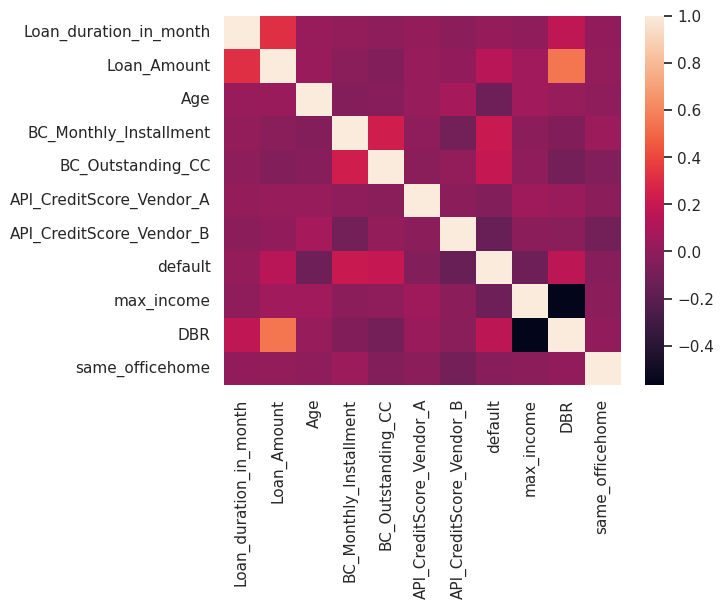

In [ ]:
# Visualization of Correlation Between All Numerical Variables
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [ ]:
df_train_1.head()

,ID,Loan_duration_in_month,Purpose,Loan_Amount,Occupation,Monthly_Income,Length_Employment,Marital_Status,Residential_Property_Status,Home_Address,...,BC_Monthly_Installment,BC_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Mobile_Provider,Mobile_Number_Active_Since,default,max_income,DBR,same_officehome
404,ABC0405,3,electronics,100,permanent_employee,e. More 2000,e. More7 years,married,own,Area_2,...,21,167,501,283,Telco_C,5. More5_years,0.0,3000,0.033333,0
522,ABC0523,6,electronics,200,permanent_employee,a. Less 100,c. 1-4 years,married,family_owned,Area_2,...,0,0,48,91,Telco_E,1. Less_1_month,1.0,100,2.000000,1
749,ABC0750,3,business_loan,100,permanent_employee,a. Less 100,d. 4-7 years,married,own,Area_2,...,35,6,210,220,Telco_A,5. More5_years,0.0,100,1.000000,0
41,ABC0042,6,electronics,50,permanent_employee,c. 500 - 1000,c. 1-4 years,divorced,own,Area_3,...,16,55,110,111,Telco_A,3. 1_to_2_years,0.0,1000,0.050000,0
495,ABC0496,4,electronics,100,permanent_employee,e. More 2000,c. 1-4 years,divorced,own,Area_3,...,42,159,364,113,Telco_A,1. Less_1_month,1.0,3000,0.033333,0


In [ ]:
## Choose either DBR or loan_amount and max_income

                              Purpose Occupation Monthly_Income  \
Purpose                             1   0.086293       0.012283   
Occupation                   0.086293          1       0.028545   
Monthly_Income               0.012283   0.028545              1   
Length_Employment            0.072629   0.323176       0.064164   
Marital_Status               0.086592   0.043713        0.03213   
Residential_Property_Status   0.10935   0.132294            0.0   
Home_Address                 0.021339   0.088418            0.0   
Office_Address               0.029221        0.0       0.079939   
Present_Residence_Since      0.091625        0.0            0.0   
Email_Domain_Type            0.141404   0.167541       0.103008   
BC_Collectability            0.063111   0.051011        0.02801   
Mobile_Provider              0.086295   0.088162        0.03091   
Mobile_Number_Active_Since        0.0   0.035624            0.0   

                            Length_Employment Marital_Status 

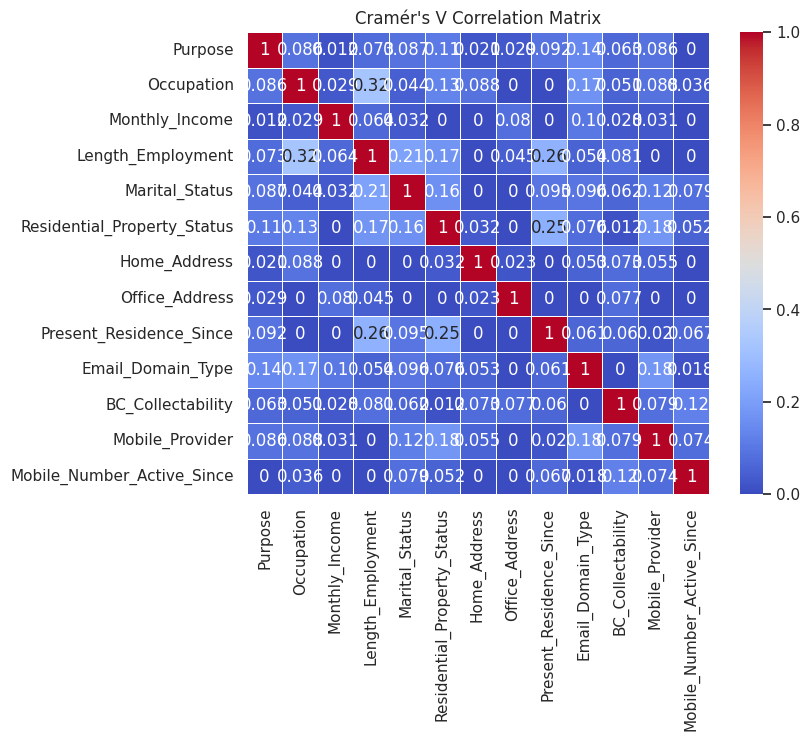

In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

df_numeric = df_train_1.select_dtypes(include=['float64','int64','int'])
df_categoric = df_train_1.select_dtypes(exclude = ['float64','int64','int','datetime'])
df_categoric = df_categoric.drop('ID', axis=1)

# Calculate Cramér's V for all pairs of categorical variables in the DataFrame
cat_vars = df_categoric.columns
correlations = pd.DataFrame(index=cat_vars, columns=cat_vars)

for var1, var2 in combinations(cat_vars, 2):
    corr = cramers_v(df_categoric[var1], df_categoric[var2])
    correlations.loc[var1, var2] = corr
    correlations.loc[var2, var1] = corr

for var in cat_vars:
    correlations.loc[var, var] = 1

print(correlations)

# Convert the correlations matrix to float
correlations = correlations.astype(float)

# Create a heatmap of the correlations matrix
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True, linewidths=.5, annot_kws={"size": 12})
plt.title("Cramér's V Correlation Matrix")
plt.show()

## 4.4 WoE and IV for all variables Automatically


In [ ]:
# Automatic WoE of all variables
# Using Toad (https://toad.readthedocs.io/en/stable/tutorial.html) to calculate WoE and IV

# Only select variables with IV at least 0.05 and no correlation
train_selected, dropped = toad.selection.select(df_train_1,target = 'default', empty = 0.5, iv = 0.05, corr = 0.7, return_drop=True, exclude=['ID'])
print(dropped)
print(train_selected.shape)


{'empty': array([], dtype=float64), 'iv': array(['Occupation', 'Marital_Status', 'Home_Address', 'Office_Address',
       'Present_Residence_Since', 'Email_Domain_Type', 'same_officehome'],
      dtype=object), 'corr': array([], dtype=object)}
(528, 18)


/usr/local/lib/python3.10/dist-packages/toad/selection.py:329: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = f.corr().abs()


In [ ]:
# Create binning for WoE and IV calculation

# initialise
c = toad.transform.Combiner()

to_drop=['ID']
# Train binning with the selected features from previous; use reliable Chi-squared binning, and control that each bucket has at least 5% sample.
c.fit(train_selected, y = 'default', method = 'chi', min_samples = 0.05, exclude = to_drop) #empty_separate = False

# For the demonstration purpose, only showcase 3 bin results.
print('BC_Collectability:',c.export()['BC_Collectability'])
print('DBR:',c.export()['DBR'])
print('API_CreditScore_Vendor_A:',c.export()['API_CreditScore_Vendor_A'])

BC_Collectability: [['Collectability 1'], ['Collectability 2'], ['Collectability 3'], ['Collectability 4', 'Not Found', 'Collectability 5']]
DBR: [0.025, 0.06666666666666667, 0.15, 0.5, 0.6, 2.0]
API_CreditScore_Vendor_A: [200, 477, 553, 587]


<Axes: xlabel='API_CreditScore_Vendor_A', ylabel='prop'>

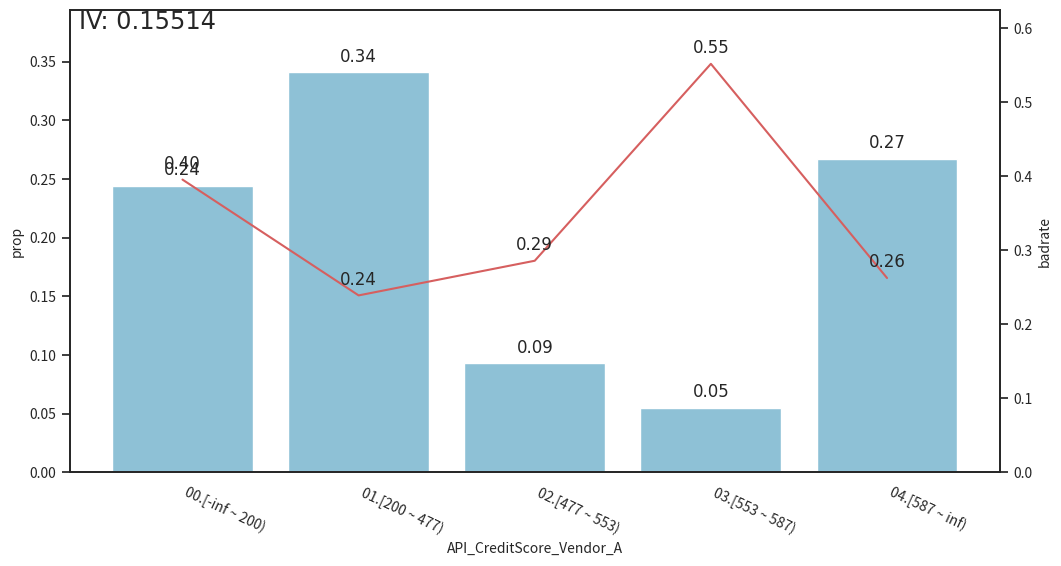

In [ ]:
# Visualization example for Data

from toad.plot import bin_plot

# Check the bin results of 'var_d2' of in-sample
col = 'API_CreditScore_Vendor_A'

# It's recommended to set 'labels = True' for better visualisation.
bin_plot(c.transform(train_selected[[col,'default']], labels=True), x=col, target='default')

In [ ]:
# Create binning for training and test
transer = toad.transform.WOETransformer()

# transer.fit_transform() & combiner.transform(). Remember to exclude target
train_woe = transer.fit_transform(c.transform(train_selected), train_selected['default'], exclude=to_drop+['default'])
test_woe = transer.transform(c.transform(df_test_1))

print(train_woe.head(3))
print(test_woe.head(3))

          ID  Loan_duration_in_month   Purpose  Loan_Amount  Monthly_Income  \
404  ABC0405               -0.387983  0.039519    -0.162245       -0.435585   
522  ABC0523                0.405247  0.039519     0.605268        0.178666   
749  ABC0750               -0.387983 -0.217496    -0.162245        0.178666   

     Length_Employment  Residential_Property_Status       Age  \
404          -0.438284                    -0.210116 -0.256472   
522           0.098549                     0.492600 -0.147903   
749          -0.108863                    -0.210116  0.066272   

     BC_Collectability  BC_Monthly_Installment  BC_Outstanding_CC  \
404          -0.076829               -0.642380          -0.025642   
522           0.916331                1.047101          -0.333495   
749           0.130810               -0.642380          -0.402488   

     API_CreditScore_Vendor_A  API_CreditScore_Vendor_B  Mobile_Provider  \
404                 -0.092333                  0.046253        -0.176

## 4.5 Stepwise Variable Selection

In [ ]:
# Apply stepwise regression on the WOE-transformed data
final_data = toad.selection.stepwise(train_woe,target = 'default', estimator='ols', direction = 'both', criterion = 'aic', exclude = to_drop)

#  Place the selected features to test / OOT sample
final_test = test_woe[final_data.columns]

print(final_data.shape) #  Stepwise regression selected how many input variables of them.
# The final list of features for modelling
col = list(final_data.drop(to_drop+['default'],axis=1).columns)
print(col)

(528, 8)
['Age', 'BC_Monthly_Installment', 'BC_Outstanding_CC', 'API_CreditScore_Vendor_A', 'Mobile_Provider', 'Mobile_Number_Active_Since']


In [ ]:
# Check PSI (Population Stability Index) of each variable
toad.metrics.PSI(final_data[col], final_test[col])

Age                           0.007493
BC_Monthly_Installment        0.033556
BC_Outstanding_CC             0.034375
API_CreditScore_Vendor_A      0.030182
Mobile_Provider               0.079505
Mobile_Number_Active_Since    0.018843
dtype: float64

## 4.6 Logistic Regression

In [ ]:
# Build a logit
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(final_data[col], final_data['default'])

#print regression coefficients
print('coefficients', col, lr.coef_)

#print intercept value
print('intercept', lr.intercept_)

coefficients ['Age', 'BC_Monthly_Installment', 'BC_Outstanding_CC', 'API_CreditScore_Vendor_A', 'Mobile_Provider', 'Mobile_Number_Active_Since'] [[0.86588151 0.84144645 0.9490814  0.93962628 1.01594945 1.03585209]]
intercept [-0.80026246]


In [ ]:
# Predict train and test
# Obtain predicted probability for training and OOT
pred_train = lr.predict_proba(final_data[col])[:,1]
pred_test = lr.predict_proba(final_test[col])[:,1]

## 4.7 Evaluate Model Performance

In [ ]:
from toad.metrics import KS, AUC
print('Train results')
print('train KS',KS(pred_train, final_data['default']))
print('train AUC',AUC(pred_train, final_data['default']))
print('Test results')
print('test KS',KS(pred_test, final_test['default']))
print('test AUC',AUC(pred_test, final_test['default']))

Train results
train KS 0.49806217949802833
train AUC 0.8180648873694722
Test results
test KS 0.5054500155714731
test AUC 0.7795079414512611


In [ ]:
print(toad.metrics.PSI(pred_train,pred_test))

0.16410886256748325


In [ ]:
# Group the predicted scores in bins with same number of samples in each (i.e. "quantile" binning)
toad.metrics.KS_bucket(pred_train, final_data['default'], bucket=10, method = 'quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,0.009892,0.060644,4.0,49.0,53.0,0.075472,0.924528,0.081633,0.024845,0.133515,...,0.304924,0.024845,1.000000,0.133515,1.000000,0.100379,1.000000,0.108670,0.247510,1.000000
1,0.061367,0.095685,3.0,50.0,53.0,0.056604,0.943396,0.060000,0.018634,0.136240,...,0.330526,0.043478,0.975155,0.269755,0.866485,0.200758,0.899621,0.226277,0.185632,1.083962
2,0.095946,0.122771,5.0,48.0,53.0,0.094340,0.905660,0.104167,0.031056,0.130790,...,0.364929,0.074534,0.956522,0.400545,0.730245,0.301136,0.799242,0.326011,0.309387,1.196785
3,0.122803,0.167917,11.0,41.0,52.0,0.211538,0.788462,0.268293,0.068323,0.111717,...,0.403794,0.142857,0.925466,0.512262,0.599455,0.399621,0.698864,0.369404,0.693741,1.324244
4,0.167996,0.215975,12.0,41.0,53.0,0.226415,0.773585,0.292683,0.074534,0.111717,...,0.435331,0.217391,0.857143,0.623978,0.487738,0.500000,0.600379,0.406587,0.742529,1.427670
5,0.216894,0.296714,10.0,43.0,53.0,0.188679,0.811321,0.232558,0.062112,0.117166,...,0.477273,0.279503,0.782609,0.741144,0.376022,0.600379,0.500000,0.461641,0.618774,1.565217
6,0.298306,0.378916,13.0,39.0,52.0,0.250000,0.750000,0.333333,0.080745,0.106267,...,0.549763,0.360248,0.720497,0.847411,0.258856,0.698864,0.399621,0.487163,0.819876,1.802950
7,0.380713,0.514830,19.0,34.0,53.0,0.358491,0.641509,0.558824,0.118012,0.092643,...,0.647799,0.478261,0.639752,0.940054,0.152589,0.799242,0.301136,0.461794,1.175671,2.124458
8,0.519414,0.697676,33.0,20.0,53.0,0.622642,0.377358,1.650000,0.204969,0.054496,...,0.792453,0.683230,0.521739,0.994550,0.059946,0.899621,0.200758,0.311321,2.041955,2.598852
9,0.697838,0.991755,51.0,2.0,53.0,0.962264,0.037736,25.500000,0.316770,0.005450,...,0.962264,1.000000,0.316770,1.000000,0.005450,1.000000,0.100379,-0.000000,3.155748,3.155748


In [ ]:
# Group the predicted scores in bins with same number of samples in each (i.e. "quantile" binning)
toad.metrics.KS_bucket(pred_test, final_test['default'], bucket=10, method = 'quantile')

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,...,cum_bad_rate_rev,cum_bads_prop,cum_bads_prop_rev,cum_goods_prop,cum_goods_prop_rev,cum_total_prop,cum_total_prop_rev,ks,lift,cum_lift
0,0.011858,0.054355,2.0,21.0,23.0,0.086957,0.913043,0.095238,0.035088,0.124260,...,0.252212,0.035088,1.000000,0.124260,1.000000,0.101770,1.000000,0.089173,0.344775,1.000000
1,0.054917,0.089170,1.0,21.0,22.0,0.045455,0.954545,0.047619,0.017544,0.124260,...,0.270936,0.052632,0.964912,0.248521,0.875740,0.199115,0.898230,0.195889,0.180223,1.074237
2,0.094633,0.120086,2.0,21.0,23.0,0.086957,0.913043,0.095238,0.035088,0.124260,...,0.298343,0.087719,0.947368,0.372781,0.751479,0.300885,0.800885,0.285062,0.344775,1.182902
3,0.120146,0.149636,0.0,22.0,22.0,0.000000,1.000000,0.000000,0.000000,0.130178,...,0.329114,0.087719,0.912281,0.502959,0.627219,0.398230,0.699115,0.415239,0.000000,1.304908
4,0.150670,0.188644,5.0,17.0,22.0,0.227273,0.772727,0.294118,0.087719,0.100592,...,0.382353,0.175439,0.912281,0.603550,0.497041,0.495575,0.601770,0.428112,0.901116,1.515996
5,0.191394,0.234987,4.0,19.0,23.0,0.173913,0.826087,0.210526,0.070175,0.112426,...,0.412281,0.245614,0.824561,0.715976,0.396450,0.597345,0.504425,0.470362,0.689550,1.634657
6,0.237611,0.338055,8.0,15.0,23.0,0.347826,0.652174,0.533333,0.140351,0.088757,...,0.472527,0.385965,0.754386,0.804734,0.284024,0.699115,0.402655,0.418769,1.379100,1.873530
7,0.343006,0.483423,11.0,11.0,22.0,0.500000,0.500000,1.000000,0.192982,0.065089,...,0.514706,0.578947,0.614035,0.869822,0.195266,0.796460,0.300885,0.290875,1.982456,2.040764
8,0.483717,0.601449,9.0,14.0,23.0,0.391304,0.608696,0.642857,0.157895,0.082840,...,0.521739,0.736842,0.421053,0.952663,0.130178,0.898230,0.203540,0.215821,1.551487,2.068650
9,0.617630,0.979979,15.0,8.0,23.0,0.652174,0.347826,1.875000,0.263158,0.047337,...,0.652174,1.000000,0.263158,1.000000,0.047337,1.000000,0.101770,-0.000000,2.585812,2.585812


# 5. Machine Learning

## 5.1 Data preparation for machine learning

In [ ]:
# Function code for faster calculation

import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def data_preparation(df_input):
  df_output = df_input.copy()

  # Drop variable ID as it is customer identification
  df_output.drop(['ID'], axis = 1, inplace = True)

  return df_output

def data_category_dummyvariables(df_input):
  # Separate categorical variables with numerical variables
  df_numeric = df_input.select_dtypes(include=['float64','int64','int'])
  df_categoric = df_input.select_dtypes(exclude = ['float64','int64','int','datetime'])

  # Using the get_dummies function from pandas to do one hot encoding
  dataset_dummies_df = pd.get_dummies(df_categoric, drop_first = True)

  # Combining categorical variable datasets from one hot encoding with numeric variables
  df_output = pd.concat([df_numeric, dataset_dummies_df], axis = 1)

  # Reset the index of the data frame
  df_output = df_output.reset_index(drop=True)

  return df_output

def divide_X_y(df_input, target):
  y_output = df_input.loc[:,target]
  X_output = df_input.loc[:,df_input.columns != target]

  return X_output, y_output

def scaling(X_input):
  # Using standard scaler dari library sklearn
  sc = StandardScaler()
  return sc.fit_transform(X_input)

def model_review(y_actual, y_predict):
  # Chart
  confusion_matrix = metrics.confusion_matrix(y_actual, y_predict)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
  cm_display.plot()
  plt.show()

  # Result
  # Obtain the results from the classification report and confusion matrix
  print('Classifcation report:\n', classification_report(y_actual, y_predict))
  conf_mat = metrics.confusion_matrix(y_actual, y_predict)
  print('Confusion matrix:\n', conf_mat)
  # Calculate the AUC
  roc_auc = roc_auc_score(y_actual, y_predict)
  print('ROC AUC Score:\n', roc_auc)

## 5.2 Decision Tree

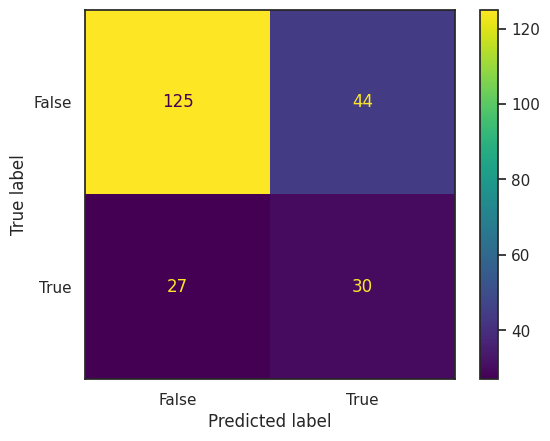

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       169
         1.0       0.41      0.53      0.46        57

    accuracy                           0.69       226
   macro avg       0.61      0.63      0.62       226
weighted avg       0.72      0.69      0.70       226

Confusion matrix:
 [[125  44]
 [ 27  30]]
ROC AUC Score:
 0.6329803799439427


In [ ]:
# Simple decision Tree -> Decision Tree (with default value) - decision tree not using scaling
from sklearn.tree import DecisionTreeClassifier

# Train Model preparation
df_tree_train = data_preparation(df_train_1)
df_tree_train = data_category_dummyvariables(df_tree_train)
X_train_tree, y_train_tree = divide_X_y(df_tree_train, 'default')

# Training the Decision Tree classification model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_tree, y_train_tree)

# Test Model preparation
df_tree_test = data_preparation(df_test_1)
df_tree_test = data_category_dummyvariables(df_tree_test)
X_test_tree, y_test_tree = divide_X_y(df_tree_test, 'default')

# Predict y_test using Logistic Regression
y_test_predict = model.predict(X_test_tree)

# Model review
model_review(y_test_tree, y_test_predict)

[Text(0.8385587152209493, 0.9705882352941176, 'BC_Outstanding_CC <= 353.5\ngini = 0.424\nsamples = 528\nvalue = [367, 161]'),
 Text(0.7033040098199672, 0.9117647058823529, 'Mobile_Provider_Telco_E <= 0.5\ngini = 0.387\nsamples = 488\nvalue = [360, 128]'),
 Text(0.5179009819967266, 0.8529411764705882, 'API_CreditScore_Vendor_B <= 297.5\ngini = 0.348\nsamples = 432\nvalue = [335, 97]'),
 Text(0.5048076923076923, 0.7941176470588235, 'Marital_Status_married <= 0.5\ngini = 0.382\nsamples = 377\nvalue = [280, 97]'),
 Text(0.32733224222585927, 0.7352941176470589, 'BC_Monthly_Installment <= 58.5\ngini = 0.45\nsamples = 184\nvalue = [121, 63]'),
 Text(0.23076923076923078, 0.6764705882352942, 'DBR <= 1.5\ngini = 0.396\nsamples = 136\nvalue = [99, 37]'),
 Text(0.19803600654664485, 0.6176470588235294, 'API_CreditScore_Vendor_B <= 290.5\ngini = 0.367\nsamples = 128\nvalue = [97, 31]'),
 Text(0.1718494271685761, 0.5588235294117647, 'Age <= 37.5\ngini = 0.343\nsamples = 123\nvalue = [96, 27]'),
 Text

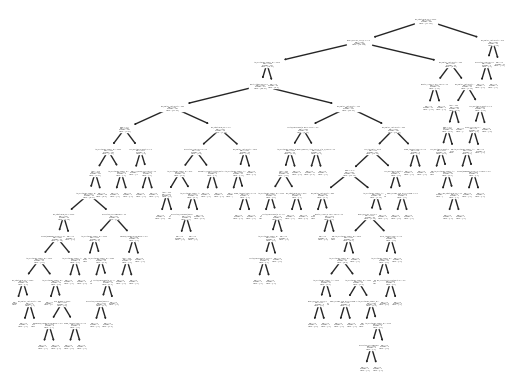

In [ ]:
# Visualization of Decision Tree
from sklearn import tree

tree.plot_tree(model, feature_names=X_train_tree.columns)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


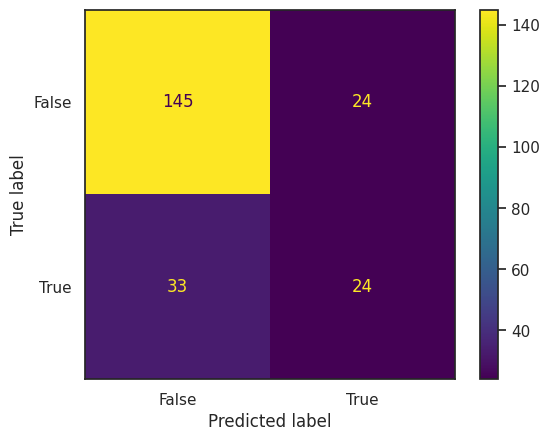

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.84       169
         1.0       0.50      0.42      0.46        57

    accuracy                           0.75       226
   macro avg       0.66      0.64      0.65       226
weighted avg       0.74      0.75      0.74       226

Confusion matrix:
 [[145  24]
 [ 33  24]]
ROC AUC Score:
 0.6395203986297103


In [ ]:
## Decision Tree (hyperparameter tuning) - decision tree not using scaling
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_tree, y_train_tree)

dt_best = grid_search.best_estimator_

# Predict y_test using Logistic Regression
y_test_predict = grid_search.predict(X_test_tree)

# Model review
model_review(y_test_tree, y_test_predict)

## 5.3 Random Forest

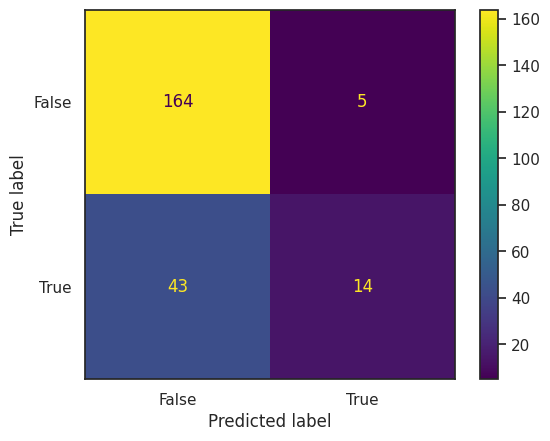

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       169
         1.0       0.74      0.25      0.37        57

    accuracy                           0.79       226
   macro avg       0.76      0.61      0.62       226
weighted avg       0.78      0.79      0.75       226

Confusion matrix:
 [[164   5]
 [ 43  14]]
ROC AUC Score:
 0.6080141181355755


In [ ]:
## X.X Random Forest (with default value) - Tree based solution does not need scaling

# Train Model preparation
df_rf_train = data_preparation(df_train_1)
df_rf_train = data_category_dummyvariables(df_rf_train)
X_train_rf, y_train_rf = divide_X_y(df_rf_train, 'default')

# Training the Random Forest classification model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_rf, y_train_rf)

# Test Model prepration
df_rf_test = data_preparation(df_test_1)
df_rf_test = data_category_dummyvariables(df_rf_test)
X_test_rf, y_test_rf = divide_X_y(df_rf_test, 'default')

# Predict y_test using Logistic Regression
y_test_predict = model.predict(X_test_rf)

# Model review
model_review(y_test_rf, y_test_predict)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
Permutation explainer: 227it [01:12,  2.90it/s]


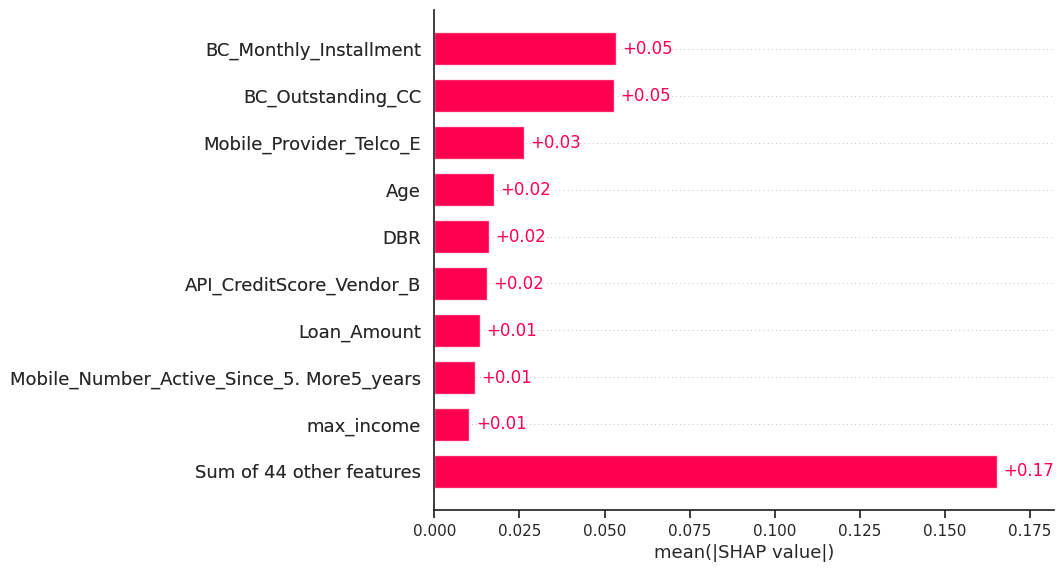

In [ ]:
## X.X Variable Explanation of Random Forest (with default value)

# SHAP shows the contribution or the importance of each feature on the prediction of the model
# Reference: https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

import shap
import matplotlib.pyplot as plt

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test_rf)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_rf)

shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


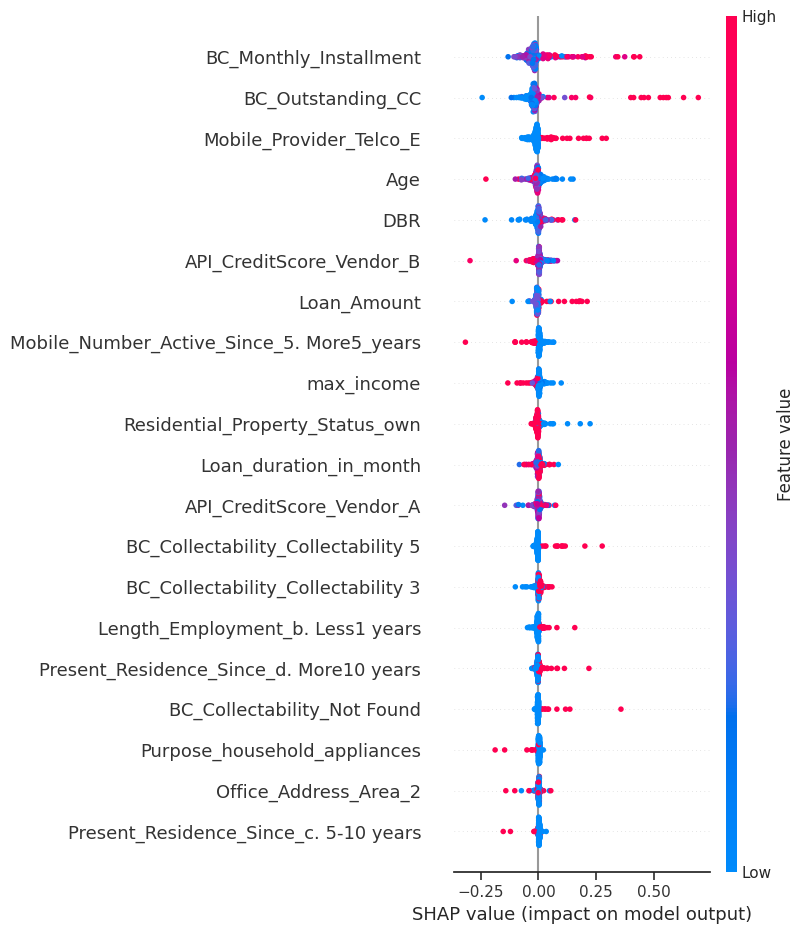

In [ ]:
# Detail of the Shap value
shap.summary_plot(shap_values)

{'max_depth': 15, 'max_features': 20, 'min_samples_split': 3, 'n_estimators': 300}


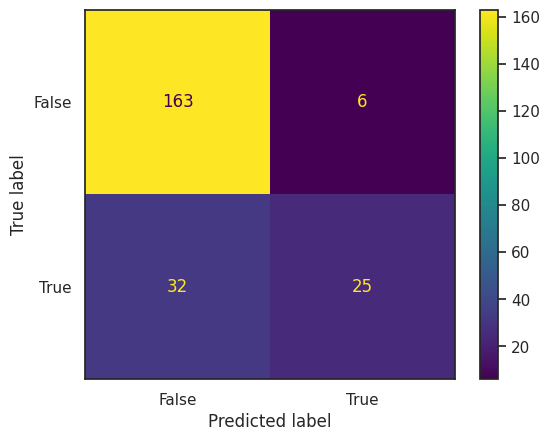

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       169
         1.0       0.81      0.44      0.57        57

    accuracy                           0.83       226
   macro avg       0.82      0.70      0.73       226
weighted avg       0.83      0.83      0.81       226

Confusion matrix:
 [[163   6]
 [ 32  25]]
ROC AUC Score:
 0.7015467663240943


In [ ]:
## X.X Random Forest (with hyperparameter) - Tree based solution does not need scaling

# Using GridSearchCV to fine tune the Random Forest parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
rfc = RandomForestClassifier()

# Use the random grid to search for best hyperparameters
forest_params =   [{  'min_samples_split': [3, 5, 10],
                      'n_estimators' : [100, 300],
                      'max_depth': [3, 5, 15, 25],
                      'max_features': [3, 5, 10, 20]
                  }]
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train_rf, y_train_rf) #It could take 10 mins to run this code. Beware of inactivitiy from Google Colab

print(clf.best_params_)

# Predict y_test using Logistic Regression
y_test_predict = clf.predict(X_test_rf)

# Model review
model_review(y_test_rf, y_test_predict)

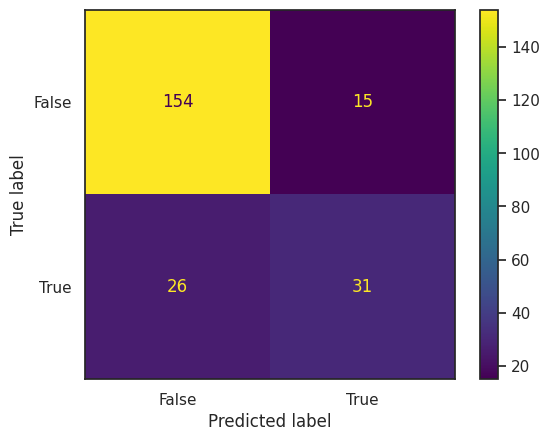

Classifcation report:
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       169
         1.0       0.67      0.54      0.60        57

    accuracy                           0.82       226
   macro avg       0.76      0.73      0.74       226
weighted avg       0.81      0.82      0.81       226

Confusion matrix:
 [[154  15]
 [ 26  31]]
ROC AUC Score:
 0.7275511263365514


In [ ]:
## X.X XGBoost (with default value) - Tree based solution does not need scaling

# Train Model preparation
df_xgb_train = data_preparation(df_train_1)
df_xgb_train = data_category_dummyvariables(df_xgb_train)
X_train_xgb, y_train_xgb = divide_X_y(df_xgb_train, 'default')

# Training the XGBoost classification model
from xgboost import XGBClassifier
model = XGBClassifier(objective='binary:logistic', seed=42)
model.fit(X_train_xgb.values, y_train_xgb.values)

# Test Model prepration
df_xgb_test = data_preparation(df_test_1)
df_xgb_test = data_category_dummyvariables(df_xgb_test)
X_test_xgb, y_test_xgb = divide_X_y(df_xgb_test, 'default')

# Predict y_test using Logistic Regression
y_test_predict = model.predict(X_test_xgb.values)

# Model review
model_review(y_test_xgb, y_test_predict)

In [ ]:
## X.X XGBoost (with hyperparameter) - Tree based solution does not need scaling

# Using GridSearchCV to fine tune the XGBoost parameters
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(objective='binary:logistic',nthread=4,seed=42)

# Use the random grid to search for best hyperparameters
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(estimator=xgb,param_grid=parameters,scoring = 'accuracy',n_jobs = 10,cv = 10,verbose=True)
grid_search.fit(X_train_xgb, y_train_xgb)

print(grid_search.best_params_)

# Predict y_test using Logistic Regression
y_test_predict = grid_search.predict(X_test_xgb)

# Model review
model_review(y_test_xgb, y_test_predict)

In [ ]:
## X.X Variable Explanation of XGBoost (with default value)

import shap
import matplotlib.pyplot as plt

# Fits the explainer
explainer = shap.Explainer(model.predict)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test_xgb.values)

shap.summary_plot(shap_values)